# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Student 1 - __[student1@ulb.ac.be](mailto:student1@ulb.ac.be) - Student ID 123456__
### Student 2 - __[student2@vub.ac.be](mailto:student2@ulb.ac.be) - Student ID 789012__
### Student 3 - __[student3@ulb.ac.be](mailto:student3@ulb.ac.be) - Student ID 345678__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


# Data preprocessing

## Missing value imputation

## Feature engineering

## Feature selection



# Model selection

## Model 1

## Model 2

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


# Alternative models





In [3]:
sub_format <- read.csv("database/Pump_it_Up_Data_Mining_the_Water_Table_-_Submission_format.csv", header=TRUE)
set_val_test <- read.csv("database/Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv", header=TRUE)
set_labels <- read.csv("database/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv", header=TRUE)
dataset <- read.csv("database/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv", header=TRUE)

choices <- length(unique(set_labels$status_group))
choices
dim(set_labels)

#apply(is.na(set_val),2,any)
data1<-replace(dataset,dataset=='',NA)#Replaced to NA
dim(na.omit(data1))
cleaning <- c("date_recorded", "num_private", "funder", "installer", "wpt_name", "subvillage", "lga", "ward", 
              "region_code", "scheme_name", "payment", "quantity", "waterpoint_type_group", "recorded_by")
X<-dataset[,setdiff(colnames(dataset),cleaning)]
X<-replace(X,X=='',NA)#Replaced to NA

choices <- length(unique(X$construction_year))
choices
choices2 <- unique(X$construction_year)
choices2

replace_na_with_mean_value<-function(vec) {
    mean_vec<-mean(vec,na.rm=T)
    vec[is.na(vec)]<-mean_vec
    vec
}

table(X$permit)
X$permit[is.na(X$permit)] <- tail(names(sort(table(X$permit))), 1)
table(X$permit)

table(X$scheme_management)
X$scheme_management[is.na(X$scheme_management)] <- tail(names(sort(table(X$scheme_management))), 1)
table(X$scheme_management)

table(X$public_meeting)
X$public_meeting[is.na(X$public_meeting)] <- tail(names(sort(table(X$public_meeting))), 1)
table(X$public_meeting)
X$construction_year[X$construction_year==0] <- NA
X$construction_year[is.na(X$construction_year)] <- mean(X$construction_year,na.rm=T)
X$construction_year <- as.integer(X$construction_year)
X$longitude[X$longitude==0] <- NA
X$longitude[is.na(X$longitude)] <- mean(X$longitude,na.rm=T)


sum(X$latitude==-0.00000002)
X$permit[X$permit=='True'] <- 1
X$permit[X$permit=='False'] <- 0

X$permit <- as.integer(X$permit)

X$public_meeting[X$public_meeting=='True'] <- 1
X$public_meeting[X$public_meeting=='False'] <- 0

X$public_meeting <- as.integer(X$public_meeting)

#one hot conversion
#install.packages('dummies')
library(dummies)


variables_to_keep<-names(X)
X_onehot <- dummy.data.frame(X[,variables_to_keep], sep="_")
#names(data_factor_onehot)
X_onehot
vars <- c("id", "status_group")

labels_onehot <- dummy.data.frame(set_labels[,vars], sep="_")

names(labels_onehot)[names(labels_onehot) == "status_group_functional"] <- "functional"
names(labels_onehot)[names(labels_onehot) == "status_group_functional needs repair"] <- "functional_needs_repair"
names(labels_onehot)[names(labels_onehot) == "status_group_non functional"] <- "non_functional"
labels_onehot

#set_labels$status_group[set_labels$status_group=='functional']<-0
#set_labels$status_group[set_labels$status_group=='functional needs repair']<-0.5
#set_labels$status_group[set_labels$status_group=='non functional']<-1

#set_labels$status_group <- as.double(set_labels$status_group)
#set_labels
Y<-labels_onehot[,setdiff(colnames(labels_onehot),"id")]
Y<-set_labels[2]
Y[Y == "functional needs repair"] <- "functional_needs_repair"
Y[Y == "non functional"] <- "non_functional"
Y
X_final<-X_onehot[,setdiff(colnames(X_onehot),"id")]
X_final
N<-nrow(X_final)    #Number of examples
n<-ncol(X_final)    #Number of input variables

names(X_final)<-make.names(names(X_final))


[1] 3

[1] 59400     2

[1] 27813    40

[1] 55

[1] 1999 2010 2009 1986    0 2011 1987 1991 1978 1992 2008 1974 2000 2002 2004
[16] 1972 2003 1980 2007 1973 1985 1970 1995 2006 1962 2005 1997 2012 1996 1977
[31] 1983 1984 1990 1982 1976 1988 1989 1975 1960 1961 1998 1963 1971 1994 1968
[46] 1993 2001 1979 1967 2013 1969 1981 1964 1966 1965


False  True 
17492 38852 


False  True 
17492 41908 


         Company             None            Other       Parastatal 
            1061                1              766             1680 
Private operator              SWC            Trust              VWC 
            1063               97               72            36793 
 Water authority      Water Board              WUA              WUG 
            3153             2748             2883             5206 


         Company             None            Other       Parastatal 
            1061                1              766             1680 
Private operator              SWC            Trust              VWC 
            1063               97               72            40670 
 Water authority      Water Board              WUA              WUG 
            3153             2748             2883             5206 


False  True 
 5055 51011 


False  True 
 5055 54345 

[1] 1812

dummies-1.5.6 provided by Decision Patterns


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 

,id,amount_tsh,gps_height,longitude,latitude,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,...,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,69572,6000,1390,34.93809,-9.85632177,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,8776,0,1399,34.69877,-2.14746569,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,34310,25,686,37.46066,-3.82132853,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,67743,0,263,38.48616,-11.15529772,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5,19728,0,0,31.13085,-1.82535885,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
6,9944,20,0,39.17280,-4.76558728,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7,19816,0,0,33.36241,-3.76636472,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,54551,0,0,32.62062,-4.22619802,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
9,53934,0,0,32.71110,-5.14671181,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"


,id,functional,functional_needs_repair,non_functional
,<int>,<int>,<int>,<int>
1,69572,1,0,0
2,8776,1,0,0
3,34310,1,0,0
4,67743,0,0,1
5,19728,1,0,0
6,9944,1,0,0
7,19816,0,0,1
8,54551,0,0,1
9,53934,0,0,1


status_group
<chr>
functional
functional
functional
non_functional
functional
functional
non_functional
non_functional
non_functional


,amount_tsh,gps_height,longitude,latitude,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,...,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6000,1390,34.93809,-9.85632177,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1399,34.69877,-2.14746569,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,25,686,37.46066,-3.82132853,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,263,38.48616,-11.15529772,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5,0,0,31.13085,-1.82535885,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
6,20,0,39.17280,-4.76558728,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
7,0,0,33.36241,-3.76636472,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,0,0,32.62062,-4.22619802,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
9,0,0,32.71110,-5.14671181,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [4]:
#install.packages("xgboost")
#install.packages("archdata")
#install.packages("caret")    # for the confusionmatrix() function (also needs e1071 package)
#install.packages("dplyr")    # for some data preperation
#install.packages("Ckmeans.1d.dp") # for xgb.ggplot.importance

library("xgboost")  # the main algorithm
library("archdata") # for the sample dataset
library("caret")    # for the confusionmatrix() function (also needs e1071 package)
library("dplyr")    # for some data preperation
library("Ckmeans.1d.dp") # for xgb.ggplot.importance

Loading required package: lattice

Loading required package: ggplot2


Attaching package: 'dplyr'


The following object is masked from 'package:xgboost':

    slice


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
require(xgboost)

In [5]:
# XGBoost requires the classes to be in integer format, starting with 0.
set_labels$status_group[set_labels$status_group == 'functional']<-0
set_labels$status_group[set_labels$status_group == 'functional needs repair']<-1
set_labels$status_group[set_labels$status_group == 'non functional']<-2
set_labels$status_group<-factor(set_labels$status_group)

num_class = length(levels(set_labels$status_group))
num_class
states = set_labels$status_group

label = as.integer(states)-1
label

[1] 3

[1] 0 0 0 2 0 0 2 2 2 0 0 0 0 0 0 0 2 2 1 0 0 0 1 0 0 1 0 0 2 0 0 0 1 0 0 2
   [37] 2 0 0 2 0 0 0 2 1 2 1 0 0 0 0 2 0 2 0 2 0 2 0 1 0 2 1 2 0 2 0 2 2 2 2 2
   [73] 2 2 0 2 0 0 2 0 0 1 0 0 2 2 0 2 2 1 1 2 2 0 2 0 2 0 1 2 2 0 0 1 0 0 0 2
  [109] 2 0 2 0 0 0 2 2 0 2 0 2 2 0 2 0 0 2 0 0 2 2 0 0 0 0 0 0 2 2 0 0 2 0 2 0
  [145] 2 0 1 0 2 0 0 0 2 2 0 2 0 1 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 2 0 2
  [181] 0 0 0 2 0 0 2 0 1 0 2 0 0 2 0 0 0 2 2 1 0 2 0 0 1 2 0 0 2 0 2 2 2 2 1 2
  [217] 1 0 0 1 0 1 2 0 2 0 0 0 0 0 0 2 1 2 2 2 2 1 1 2 2 2 2 2 0 2 0 0 0 2 0 0
  [253] 2 1 0 2 2 2 0 2 2 2 2 2 0 2 1 0 0 0 2 2 0 0 0 2 0 2 0 1 0 0 0 2 1 0 2 0
  [289] 0 2 2 2 0 0 0 0 2 2 2 2 0 0 0 2 0 2 0 1 1 2 2 2 2 2 2 2 0 2 2 1 1 1 0 2
  [325] 0 2 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 2 0 0 2 0 2 0 0 0 0 1 0 1 1 2 1 2 0
  [361] 2 2 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 1 1 0 0 1 0 0 0 0 2 2 0 0 0 2 0 2 2 0
  [397] 0 2 2 0 2 0 0 2 2 0 0 0 1 0 2 2 2 0 1 2 0 2 0 0 0 0 2 0 2 2 2 2 2 0 0 2
  [433] 0 0 1 2 0 2 2 0 2 2 1 0 0 1 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0
  [469] 2 2 0 2 0 0 0 2 0 0 2 0 1 0 1 2 0 2 2 2 0 2 0 0 1 0 2 2 1 0 2 2 0 0 2 2
  [505] 2 2 2 0 2 0 2 1 0 0 0 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 2 0 0 2 0 2 2 2
  [541] 2 0 2 0 0 2 0 2 1 2 0 2 0 0 0 2 0 0 0 1 0 0 0 2 2 2 0 0 0 0 2 0 0 1 2 2
  [577] 2 2 2 0 2 0 0 0 2 2 2 2 0 2 2 0 2 2 2 1 1 0 0 0 0 0 2 2 0 2 0 0 2 2 1 2
  [613] 0 0 0 0 2 2 1 0 0 0 0 0 0 0 2 0 0 2 0 1 2 2 0 2 2 0 2 0 2 0 0 1 2 2 0 0
  [649] 2 0 0 2 0 0 1 1 2 0 2 1 2 0 2 0 2 0 0 0 2 0 0 2 0 0 2 0 0 0 2 0 1 2 0 0
  [685] 0 2 0 0 0 2 2 1 0 2 0 0 2 0 2 0 0 2 2 0 0 0 2 0 2 0 2 0 1 0 2 2 2 0 2 0
  [721] 0 0 2 2 2 2 0 0 0 0 2 2 0 1 0 0 2 0 1 1 0 0 1 0 2 2 0 0 0 2 2 0 0 0 0 0
  [757] 0 2 2 0 0 0 2 1 1 0 2 2 0 1 1 0 2 0 0 1 2 2 2 2 2 0 0 0 0 0 0 2 0 2 0 0
  [793] 0 2 2 0 0 0 0 0 2 2 0 2 0 0 2 0 2 2 2 2 2 0 2 2 2 1 2 0 0 0 2 0 2 0 2 2
  [829] 2 0 0 2 0 0 0 2 0 0 2 1 0 0 2 0 0 2 0 0 0 0 2 0 2 1 2 0 0 0 0 0 2 2 2 2
  [865] 2 0 0 0 2 0 1 0 2 0 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 2 2 0 0 0 2 2 0 0 0 0
  [901] 2 0 2 0 0 2 0 0 0 0 0 1 0 0 2 2 0 1 2 0 2 2 2 2 2 0 0 0 0 2 0 0 2 2 1 0
  [937] 0 2 0 0 2 2 0 2 2 0 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 2 2 2 0 0 2 0 0 0
  [973] 2 2 2 2 0 0 0 0 2 0 2 2 0 0 0 2 1 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 1 0 0 0
 [1009] 2 2 0 0 1 0 0 0 2 2 2 2 2 0 0 0 2 0 2 0 2 2 0 2 2 2 2 2 2 1 0 0 0 0 0 1
 [1045] 2 0 0 2 0 2 2 2 0 2 0 2 0 2 0 2 2 0 0 0 1 0 0 0 0 2 0 0 2 0 2 0 0 0 0 2
 [1081] 2 2 0 2 2 0 2 2 0 2 0 2 0 2 0 0 2 2 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0
 [1117] 0 0 0 1 2 0 0 2 0 2 2 0 0 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 2 0 2 2 2 2
 [1153] 0 0 0 0 1 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 0 2 2 2 2 2 2 0 2 2 0
 [1189] 2 2 0 0 0 2 2 2 0 0 2 0 0 0 0 0 2 2 2 2 2 2 0 0 1 2 2 2 0 0 2 2 0 2 2 0
 [1225] 0 0 2 1 2 2 0 2 0 2 0 2 2 2 2 2 2 0 0 0 0 2 2 0 0 1 0 0 2 2 0 0 1 1 0 0
 [1261] 0 0 0 2 2 0 2 0 2 1 0 0 2 2 2 2 0 2 0 0 2 0 0 1 0 0 2 2 0 0 0 1 2 2 2 2
 [1297] 0 0 0 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 1 0 0 1 2 0 2 2 0 2 0 2 0 2 0 2 0 0
 [1333] 0 2 0 2 2 2 0 2 0 0 0 1 2 2 0 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0 0
 [1369] 2 0 0 0 2 0 2 0 1 1 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0
 [1405] 0 0 0 2 2 0 0 1 0 2 0 0 0 2 2 2 0 0 0 1 2 0 0 2 2 0 2 0 2 0 0 2 0 0 2 0
 [1441] 2 0 2 2 0 2 2 2 0 0 0 2 0 2 0 0 0 2 2 2 2 2 2 0 0 0 2 0 0 2 0 0 2 0 2 2
 [1477] 2 2 0 0 2 0 0 1 2 0 2 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 2 1 2 2 0 2 0 2 2 0
 [1513] 0 0 0 0 2 0 2 0 2 2 0 0 2 2 0 2 1 0 0 0 0 2 2 2 0 0 0 2 2 0 1 2 2 2 1 0
 [1549] 2 2 2 0 2 0 0 2 2 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 0 1 0 0 0 0 0 0 0 1 0
 [1585] 0 2 2 0 0 0 1 2 0 2 2 2 0 2 0 2 0 0 2 2 2 2 0 2 0 0 0 1 0 2 0 1 0 0 0 2
 [1621] 0 0 2 0 1 2 0 2 1 1 0 2 2 0 0 1 0 0 2 2 0 2 2 2 0 0 0 0 1 0 2 2 0 0 2 0
 [1657] 0 0 0 0 2 1 2 0 2 2 1 0 0 0 2 1 1 0 0 2 2 0 0 0 2 2 0 2 1 0 0 0 2 2 0 2
 [1693] 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 1 0 2 2 0 2 0 0 0 2 0 0 2 2
 [1729] 2 0 1 0 0 2 0 0 1 0 2 2 0 0 0 2 2 0 0 2 2 2 0 0 0 0 0 2 0 2 0 1 2 2 2 0
 [1765] 0 0 2 0 2 0 0 0 1 0 0 1 0 2 2 0 0 2 2 0 0 2 2 2 2 0 2 2 0 0 2 2 2 0 0 0
 [18

In [6]:
# data set is split for training (75%) and testing (25%)
n = nrow(X_final)

# training data set is used to fit the model
train.index = sample(n,floor(0.75*n))
train.data = as.matrix(X_final[train.index,])
train.data
train.label = label[train.index]
train.label
#  testing data set is held out for validation
test.data = as.matrix(X_final[-train.index,])
test.label = label[-train.index]
test.label


,amount_tsh,gps_height,longitude,latitude,basin_Internal,basin_Lake.Nyasa,basin_Lake.Rukwa,basin_Lake.Tanganyika,basin_Lake.Victoria,basin_Pangani,...,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle.trough,waterpoint_type_communal.standpipe,waterpoint_type_communal.standpipe.multiple,waterpoint_type_dam,waterpoint_type_hand.pump,waterpoint_type_improved.spring,waterpoint_type_other
49083,0,253,36.65370,-8.140143,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
12851,50,390,39.35921,-10.978090,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
25057,0,0,33.58757,-2.661217,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
47874,0,1179,35.65265,-4.152598,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
38876,0,1263,30.88063,-3.184923,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
27246,0,0,30.82761,-2.572602,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
48336,250,1050,29.87128,-4.632381,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
44495,30,291,38.50054,-5.242277,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
16481,0,0,33.65907,-8.709661,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
59392,0,540,38.04407,-4.272218,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


[1] 0 2 1 0 0 0 0 0 0 2 0 0 2 2 2 0 0 2 2 0 2 0 0 1 2 2 2 2 2 1 2 2 2 0 0 2
   [37] 0 0 0 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 0 2 0 0 0 0 0 2 0 1 2 0 2 0 1 2 2
   [73] 0 2 1 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 1 2 2 1 2 2 2 2 2 2 0 1 0 2 2
  [109] 0 0 2 1 0 1 2 0 2 0 2 2 2 2 2 2 0 0 2 2 0 2 0 0 0 0 2 0 1 0 0 2 1 0 0 2
  [145] 0 0 0 0 0 1 0 0 2 2 2 0 1 2 2 2 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 2 0 2 0 0
  [181] 2 2 2 0 0 0 0 0 2 0 0 0 0 2 2 0 2 0 2 0 1 2 2 2 0 0 0 2 0 2 0 0 0 2 0 0
  [217] 0 2 2 0 0 2 1 0 0 0 0 2 0 2 1 2 2 0 2 2 2 0 0 0 1 0 0 2 0 0 2 0 0 2 0 0
  [253] 0 0 0 0 0 0 0 0 1 2 2 2 2 2 0 0 0 0 0 2 0 0 0 2 2 1 0 2 0 2 0 0 0 0 0 0
  [289] 0 0 0 2 2 2 0 2 2 0 2 0 0 2 2 0 0 0 0 2 0 2 0 0 2 2 0 0 2 0 2 2 0 1 0 0
  [325] 0 2 0 0 0 2 2 2 0 2 2 0 0 0 0 2 0 2 2 2 0 0 0 0 0 1 0 0 0 2 0 2 2 1 0 0
  [361] 0 0 2 0 2 2 0 2 2 0 1 0 2 0 0 0 1 0 0 0 2 2 1 0 0 2 2 2 2 0 0 2 0 0 0 0
  [397] 0 0 0 0 1 0 2 0 2 0 2 0 0 0 0 0 2 0 2 2 0 0 0 1 0 0 0 0 1 0 2 2 0 0 0 0
  [433] 0 0 0 2 2 2 0 2 2 0 2 1 2 0 0 0 0 2 0 0 2 1 0 0 2 0 0 2 2 0 0 2 0 2 0 2
  [469] 0 1 2 2 0 0 0 2 0 0 0 0 2 1 0 2 2 2 0 2 2 2 2 2 0 2 0 0 0 2 1 0 0 0 0 2
  [505] 0 0 2 0 2 0 0 0 2 2 2 0 2 0 0 2 1 0 1 0 2 0 1 2 0 0 2 1 0 2 0 2 0 0 0 0
  [541] 2 2 2 0 0 2 2 0 0 2 0 1 0 0 0 2 0 0 0 2 0 0 2 0 2 0 0 0 2 0 2 2 0 2 2 2
  [577] 2 0 2 0 2 0 0 0 2 0 2 0 0 2 2 0 1 2 1 0 2 2 2 0 1 0 1 2 2 2 0 0 0 0 2 0
  [613] 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 1 2 2 0 0 2 2 0 0 1 2 2 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 1 2 2 0 0 2 2 0 0 1 2 2 2 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 1
  [685] 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 2 2 0 2 0 0 2 2 2 0 1
  [721] 0 0 2 2 2 0 1 1 0 1 2 2 2 0 2 2 2 2 2 2 2 2 0 0 2 0 0 0 0 0 2 0 0 2 2 0
  [757] 0 2 0 0 0 0 2 1 2 2 0 0 1 0 0 0 1 0 2 2 0 0 0 0 1 0 0 2 2 2 2 0 0 0 2 2
  [793] 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 2 0 0 0 0 0 2 0 0 0 2 2
  [829] 2 2 0 0 0 2 0 0 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 2 2 0 2 2 0 2 0 0
  [865] 2 0 0 2 0 0 0 2 1 0 0 0 0 2 1 2 0 2 0 2 2 2 1 0 0 0 2 0 0 0 2 0 2 2 0 2
  [901] 0 2 2 2 0 0 0 2 0 0 0 2 0 0 0 0 2 0 1 2 0 0 0 2 0 0 0 2 0 0 0 1 0 1 0 0
  [937] 0 2 0 2 0 0 0 0 1 2 0 0 0 0 2 0 2 2 0 2 0 2 0 2 2 0 0 0 2 2 0 2 0 0 2 1
  [973] 0 0 1 2 0 0 0 0 0 0 1 0 0 2 2 2 2 2 0 0 0 2 2 0 2 2 0 0 2 2 1 0 0 0 0 2
 [1009] 2 0 0 2 2 2 2 0 0 2 0 0 0 2 2 0 2 0 0 0 0 1 2 0 2 0 0 2 1 2 0 0 2 0 0 1
 [1045] 0 0 0 2 0 2 2 2 0 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 0 2 2 0 2 0 2 2
 [1081] 2 0 2 2 2 2 2 0 2 0 0 0 1 2 0 0 0 2 2 2 2 2 0 0 2 1 2 0 1 0 2 0 2 2 1 0
 [1117] 1 0 2 0 1 2 2 2 0 2 2 0 2 2 0 2 0 1 2 0 0 2 2 2 0 0 2 0 2 2 0 0 0 0 1 2
 [1153] 2 2 0 0 0 2 0 0 1 2 2 0 0 0 0 2 0 2 2 0 1 0 0 0 0 0 0 0 2 0 1 2 2 2 0 2
 [1189] 0 2 1 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0
 [1225] 0 0 0 0 1 0 0 2 0 0 0 2 2 2 0 2 0 1 0 2 1 0 0 2 2 0 0 2 2 2 0 0 2 2 0 0
 [1261] 2 0 0 2 1 2 2 0 0 1 0 0 2 1 0 0 2 0 2 0 2 2 2 1 0 0 2 0 0 2 0 0 2 0 2 0
 [1297] 2 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 0
 [1333] 0 0 2 0 2 0 0 2 0 0 2 0 0 0 2 0 1 0 0 2 0 2 2 0 0 0 0 0 0 0 0 2 2 2 2 0
 [1369] 0 2 0 1 0 1 0 0 0 2 0 1 2 0 0 2 2 0 2 2 0 2 2 0 2 2 2 0 2 2 0 0 0 2 0 0
 [1405] 0 0 0 1 0 0 2 0 0 0 0 2 0 0 2 2 2 0 2 0 0 2 0 2 2 0 0 0 0 2 1 0 2 0 1 2
 [1441] 2 0 0 0 0 2 2 2 2 2 0 2 0 0 2 0 2 0 2 0 2 2 0 2 2 0 2 0 2 2 2 0 0 2 0 2
 [1477] 0 2 0 0 2 1 0 1 0 0 2 0 0 0 2 0 0 0 2 2 0 2 0 0 2 0 2 0 2 2 0 1 2 2 2 0
 [1513] 2 2 2 2 0 0 2 0 2 2 0 0 2 2 0 0 2 1 0 0 2 2 2 0 0 0 2 0 0 2 0 2 0 2 0 0
 [1549] 2 0 2 2 0 0 0 0 2 1 0 0 2 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 0 2 2 0 2 2 2
 [1585] 0 2 0 0 0 2 0 0 0 0 0 0 0 1 2 1 1 0 0 2 1 0 2 0 0 0 0 1 2 2 2 2 2 0 2 0
 [1621] 0 0 2 0 0 2 2 2 2 1 0 0 0 2 0 1 0 2 0 0 0 1 0 0 2 2 0 2 2 1 0 0 2 2 0 0
 [1657] 0 0 2 2 2 2 0 0 2 2 2 1 0 2 1 0 0 1 0 1 0 0 2 2 0 2 0 0 2 0 0 0 2 2 0 0
 [1693] 0 1 0 2 2 0 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 2 0 2 0 0 0 0 0 2 0 2 2 2 0
 [1729] 2 0 0 2 2 0 2 0 0 2 0 2 0 0 2 0 0 0 0 0 2 2 2 2 2 2 2 0 0 2 2 0 2 2 0 1
 [1765] 0 1 1 2 0 2 0 2 0 0 0 2 2 0 0 1 0 2 0 2 2 0 0 0 2 0 0 0 1 0 0 2 2 1 2 0
 [18

[1] 0 0 0 0 0 0 1 2 0 0 0 2 2 0 2 1 2 2 2 0 0 1 0 2 0 2 2 2 0 2 0 0 2 0 0 0
   [37] 2 2 0 2 2 0 0 2 0 2 2 0 1 0 2 0 1 0 0 0 2 2 0 0 0 1 2 2 1 0 2 0 2 0 0 1
   [73] 2 2 1 0 0 0 2 2 0 0 0 0 2 1 2 2 0 0 0 1 2 1 0 0 2 2 0 0 0 0 0 2 0 0 0 0
  [109] 2 2 0 0 0 0 2 2 0 0 2 0 0 2 2 2 0 0 2 2 2 2 2 2 0 2 2 0 0 0 2 0 2 2 0 1
  [145] 0 1 2 2 0 0 0 1 0 2 0 1 0 2 0 0 2 0 0 1 0 2 0 0 2 2 0 0 2 0 2 0 0 2 1 0
  [181] 1 1 0 2 2 0 1 0 2 0 2 0 0 0 0 0 2 2 0 0 0 2 0 2 2 2 0 0 2 2 1 0 0 0 0 0
  [217] 2 0 0 2 1 2 2 2 0 0 2 2 2 2 0 0 0 0 2 2 2 0 0 0 2 0 0 2 0 1 0 0 2 2 0 2
  [253] 2 2 0 0 0 1 2 0 0 0 0 0 2 0 0 2 2 0 2 2 2 2 0 0 0 0 2 0 2 0 0 0 0 2 2 2
  [289] 0 2 0 2 2 2 0 2 0 0 0 0 0 0 2 2 0 2 0 0 2 2 0 0 1 0 0 2 0 1 2 0 0 2 2 0
  [325] 0 2 0 2 0 2 1 1 0 0 0 0 0 1 0 2 2 0 0 2 0 2 0 0 2 2 0 0 0 2 2 0 1 0 0 2
  [361] 0 0 0 0 0 2 2 1 0 0 2 0 2 2 2 0 1 2 2 2 0 0 0 0 2 0 2 0 2 2 2 2 0 1 2 0
  [397] 1 0 1 0 2 0 2 2 0 2 0 2 0 0 2 2 0 2 0 2 0 0 0 2 0 2 0 0 2 1 0 0 1 0 0 0
  [433] 2 2 2 2 0 1 0 2 2 1 2 2 2 0 0 0 2 2 0 1 2 0 0 2 2 2 0 0 2 0 2 2 1 0 0 0
  [469] 0 1 0 2 0 2 1 0 0 0 2 2 2 0 0 0 0 2 2 0 0 0 2 2 0 1 1 0 1 0 0 0 2 2 0 2
  [505] 2 0 2 2 0 2 0 0 2 0 2 2 2 2 0 1 2 2 0 0 2 2 0 0 0 0 2 0 0 0 2 0 2 0 0 2
  [541] 0 2 0 0 1 2 0 0 2 2 0 0 0 0 0 0 0 2 2 2 0 1 0 1 0 2 2 2 1 0 2 0 2 2 0 2
  [577] 0 2 0 2 0 0 0 2 0 2 2 2 2 0 2 2 2 0 0 2 0 1 0 2 0 0 2 0 0 0 2 0 0 0 0 0
  [613] 0 2 0 0 2 2 0 1 0 0 0 0 0 2 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0
  [649] 0 2 0 2 2 0 2 2 0 2 2 0 0 1 2 0 0 0 0 0 0 0 0 0 1 2 2 0 0 2 2 0 0 0 0 0
  [685] 0 0 2 0 2 0 0 0 0 0 2 2 0 1 2 0 0 2 0 0 0 2 2 2 2 2 0 2 0 0 0 2 2 0 2 0
  [721] 2 0 2 2 2 2 2 0 2 2 1 0 2 0 0 2 0 0 2 2 2 1 1 0 2 0 2 0 0 0 2 0 2 1 2 0
  [757] 0 0 2 0 2 0 0 2 2 0 0 1 0 0 0 2 2 0 0 2 2 0 2 2 0 2 0 2 0 0 0 0 2 2 0 0
  [793] 0 2 0 0 0 0 0 0 0 0 2 0 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2 2 2 2 2 0 2
  [829] 1 1 0 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 2 2 2 2 2 0 2 2 1 2 0 2 0 2 2 0 2
  [865] 0 0 2 0 2 2 0 0 2 2 2 0 2 2 0 0 0 0 2 2 0 2 0 0 2 0 2 2 0 0 0 0 2 0 0 1
  [901] 1 0 0 2 2 2 0 0 0 2 1 2 0 0 0 0 0 0 0 2 0 0 2 0 2 2 2 0 0 0 2 2 0 2 0 0
  [937] 2 0 1 0 0 0 2 0 0 2 2 1 2 2 0 0 1 2 2 2 0 2 0 0 2 2 2 2 1 0 0 0 2 2 0 0
  [973] 2 0 2 2 0 2 2 1 0 2 0 0 2 2 2 0 0 2 2 0 2 0 0 0 0 2 0 2 2 0 0 2 0 0 0 0
 [1009] 0 0 2 2 2 0 2 2 2 1 0 0 0 2 2 2 2 0 0 0 0 2 1 2 0 0 0 1 2 2 2 0 0 2 1 2
 [1045] 2 0 0 0 0 2 0 0 2 2 0 0 0 0 2 2 0 1 0 2 0 2 2 2 2 2 2 0 2 0 0 0 2 0 0 2
 [1081] 0 0 2 0 2 1 2 0 0 0 0 2 1 1 0 0 2 2 2 2 1 1 2 0 2 0 0 0 0 0 0 2 0 0 2 2
 [1117] 0 0 0 2 2 2 0 0 1 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2
 [1153] 0 0 0 2 1 1 2 0 2 2 0 2 0 2 0 0 0 2 2 0 2 0 0 0 2 0 2 2 1 0 0 0 2 0 0 0
 [1189] 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 2 2 0 2 0 2 0 2 0 0 2 2 2 2 2 1 0 2 2 2
 [1225] 0 0 2 2 0 2 2 1 2 2 0 2 0 2 2 0 0 0 2 1 0 0 0 0 0 0 2 0 0 2 2 0 1 0 2 0
 [1261] 0 1 2 2 2 0 1 1 0 2 0 2 0 0 2 0 0 0 0 0 0 2 0 2 2 2 0 2 0 1 0 2 0 0 0 2
 [1297] 2 0 2 0 2 0 0 0 1 2 0 2 2 0 2 2 0 0 0 0 2 0 0 2 0 0 2 2 2 0 0 2 0 2 0 2
 [1333] 0 0 0 0 0 0 0 1 0 0 2 2 2 0 1 2 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 2 2 0 2 2
 [1369] 2 1 2 1 0 0 0 2 0 0 2 0 1 0 2 0 0 0 0 0 0 2 0 1 2 0 2 2 0 2 2 0 2 2 0 2
 [1405] 0 0 0 0 0 2 1 0 0 0 0 2 1 2 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 2 0 2
 [1441] 0 0 1 2 0 0 1 2 2 0 0 2 0 0 0 0 0 2 0 2 0 1 0 1 0 0 2 2 0 0 0 2 0 2 2 0
 [1477] 0 0 0 2 0 1 2 2 2 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 2 2 0 0
 [1513] 0 2 0 0 1 0 0 0 2 0 0 2 2 0 0 2 2 0 1 0 0 1 2 0 0 2 2 0 2 0 0 2 2 2 2 0
 [1549] 2 0 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 2 2 0 2 0 0 0 0 0 0 2 0 0 2 2 2 0 0 0
 [1585] 2 0 2 0 0 2 0 2 0 0 0 0 2 2 0 0 0 1 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2
 [1621] 2 2 2 1 1 1 2 0 0 0 2 0 2 2 0 0 1 0 0 2 0 2 0 2 2 0 0 0 0 0 0 1 0 0 2 1
 [1657] 0 2 0 0 0 2 0 2 0 2 2 2 0 2 0 2 2 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 0 2 2 0
 [1693] 0 1 0 1 0 0 0 2 0 0 0 0 2 0 2 2 0 1 0 1 2 0 2 2 2 0 0 0 0 0 2 2 2 0 0 0
 [1729] 0 2 0 2 1 2 2 2 2 2 2 0 0 0 0 0 1 0 2 0 2 0 0 0 2 2 2 0 2 0 2 0 0 0 0 2
 [1765] 0 2 2 2 2 2 2 0 0 0 2 0 1 2 0 2 0 2 0 0 0 0 0 1 0 0 0 2 2 1 2 2 0 0 0 0
 [18

In [7]:
# transform the training and testing data sets into xgb
# DMatrix objects that are used for fitting the XGBoost model and predicting new outcomes
xgb.train = xgb.DMatrix(data=train.data,label=train.label)
xgb.test = xgb.DMatrix(data=test.data,label=test.label)

In [41]:
# XGBoost works best when its parameters are hypertuned for optimal performance
# The algorithm requires that we define the booster, objective, learning rate, and other parameters
# Here, found to be optimal through simple cross-validation
# !need to spend most of your time in this step; it’s imperative that you understand your data and use cross-validation.!

# multi:softprob objective tells the algorithm to calculate probabilities for every possible outcome
# (in this case, a probability for each of the three states of water pumps), for every observation.

# set the eval_metric to mlogloss, tell the XGBoost algorithm that we want to use a multiclass logloss as our evaluation metric

# Define the parameters for multinomial classification
num_class = length(levels(states))
num_class
params = list(
  booster="gbtree",
  eta=0.3,#79% #0.001 : 72%
  max_depth=8,#5, 79%, #8 : 80,54%
  gamma=2,#avant 3, à 0 : 80,66%
  subsample=0.75,
  colsample_bytree=1,
  objective="multi:softprob",
  eval_metric="mlogloss",
  num_class=num_class
)

[1] 3

In [15]:
cv.nfold  <- 5
# The nrounds parameter tells XGBoost how many times to iterate. This is inherently tied to the learning rate eta 
# and will most likely require tuning for your data
# cv.nfold value here is arbitrary chosen. The number of cv.nfold will typically be 5 or 10
cv_model <- xgb.cv(params = params,
                   data = xgb.train, 
                   nrounds = 250,
                   nfold = cv.nfold,
                   verbose = TRUE,
                   nthread=1,
                   early_stopping_rounds=10,
                   prediction = TRUE)


[1]	train-mlogloss:0.938776+0.000727	test-mlogloss:0.939661+0.001004 
Multiple eval metrics are present. Will use test_mlogloss for early stopping.
Will train until test_mlogloss hasn't improved in 10 rounds.

[2]	train-mlogloss:0.843538+0.000536	test-mlogloss:0.845034+0.001104 
[3]	train-mlogloss:0.781061+0.000445	test-mlogloss:0.783650+0.001535 
[4]	train-mlogloss:0.737803+0.000680	test-mlogloss:0.741378+0.002365 
[5]	train-mlogloss:0.706787+0.000696	test-mlogloss:0.711484+0.002491 
[6]	train-mlogloss:0.682461+0.001582	test-mlogloss:0.688033+0.003413 
[7]	train-mlogloss:0.663641+0.000940	test-mlogloss:0.670137+0.002142 
[8]	train-mlogloss:0.647810+0.001533	test-mlogloss:0.655347+0.002105 
[9]	train-mlogloss:0.634986+0.001305	test-mlogloss:0.643401+0.001915 
[10]	train-mlogloss:0.624285+0.001315	test-mlogloss:0.633691+0.002156 
[11]	train-mlogloss:0.615463+0.001678	test-mlogloss:0.625828+0.002452 
[12]	train-mlogloss:0.607992+0.001538	test-mlogloss:0.619464+0.003386 
[13]	train-mloglo

In [16]:
# pred object contains the predicted value for each observation in our train dataset
# the probability that each observation belongs to each class

# pred object returned from xgb.cv() contains a column for each of our classes (Sites) and 
# it s the output of the multi:softprob objective function as opposed to the multi:softmax function 
# that predicts the model likely class (not probabilities)

# we want to test the prediction, we do need to assign a class, so we use max.col() to assign the class that has the highest probability. 
# Following this, I tack on the true class as the label column

# the probability that each observation belongs to each class
OOF_prediction <- data.frame(cv_model$pred) %>%
  mutate(max_prob = max.col(., ties.method = "last"),
         label = train.label + 1)
head(OOF_prediction)

,X1,X2,X3,max_prob,label
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,0.987847567,0.003570921,0.008581545,1,1
2,0.790080011,0.087670185,0.122249790,1,1
3,0.028574141,0.002647840,0.968778014,3,3
4,0.785388470,0.167647943,0.046963546,1,1
5,0.002213453,0.001603973,0.996182501,3,3
6,0.022736941,0.001766735,0.975496352,3,3


In [17]:
# confusion matrix  assess error rate and ability of the model to generalize
# requires predicted class labels, not probabilities
# establish a probability threshold (often 0.5) or the max probability as done here
# Using a different threshold or method will have a big effect on the metric in the confusion matrix
# the metrics provided are generalized and may not be appropriate for your modeling purpose

# These need to be research and understood in the context of your problem to figure out which metric is the most appropriate.

# confusion matrix
confusionMatrix(factor(OOF_prediction$max_prob),
                factor(OOF_prediction$label),
                mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction     1     2     3
         1 21945  1929  4232
         2   345   778   176
         3  1975   496 12674

Overall Statistics
                                          
               Accuracy : 0.7945          
                 95% CI : (0.7908, 0.7983)
    No Information Rate : 0.5447          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6079          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9044  0.24290   0.7420
Specificity            0.6963  0.98740   0.9100
Pos Pred Value         0.7808  0.59892   0.8368
Neg Pred Value         0.8589  0.94393   0.8501
Precision              0.7808  0.59892   0.8368
Recall                 0.9044  0.24290   0.7420
F1                     0.8381  0.34562   0.7865
Prevalence       

In [43]:
bst_model <- xgb.train(params = params,
                       data = xgb.train,
                       nrounds = 350)
# nround = 100 : accuracy = 78% 
# nround = 250 : accuracy = 80%
# Predict hold-out test set
test_pred <- predict(bst_model, newdata = xgb.test)
test_prediction <- matrix(test_pred, nrow = num_class,
                          ncol=length(test_pred)/num_class) %>%
  t() %>%
  data.frame() %>%
  mutate(label = test.label + 1,
         max_prob = max.col(., "last"))
# confusion matrix of test set
confusionMatrix(factor(test_prediction$max_prob),
                factor(test_prediction$label),
                mode = "everything")


Confusion Matrix and Statistics

          Reference
Prediction    1    2    3
         1 7303  568 1240
         2  146  324   61
         3  666  176 4366

Overall Statistics
                                          
               Accuracy : 0.8076          
                 95% CI : (0.8012, 0.8139)
    No Information Rate : 0.5465          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6358          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.8999  0.30337   0.7704
Specificity            0.7316  0.98498   0.9083
Pos Pred Value         0.8016  0.61017   0.8383
Neg Pred Value         0.8585  0.94804   0.8651
Precision              0.8016  0.61017   0.8383
Recall                 0.8999  0.30337   0.7704
F1                     0.8479  0.40525   0.8029
Prevalence             0.5465

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
quantity_group_dry,0.21114010,0.02908179,0.011354799
longitude,0.10484348,0.16398242,0.178254783
latitude,0.09442936,0.15638124,0.172966247
waterpoint_type_other,0.07909726,0.01013448,0.008243895
construction_year,0.06211324,0.06102081,0.066573340
gps_height,0.03872478,0.06592956,0.085705397


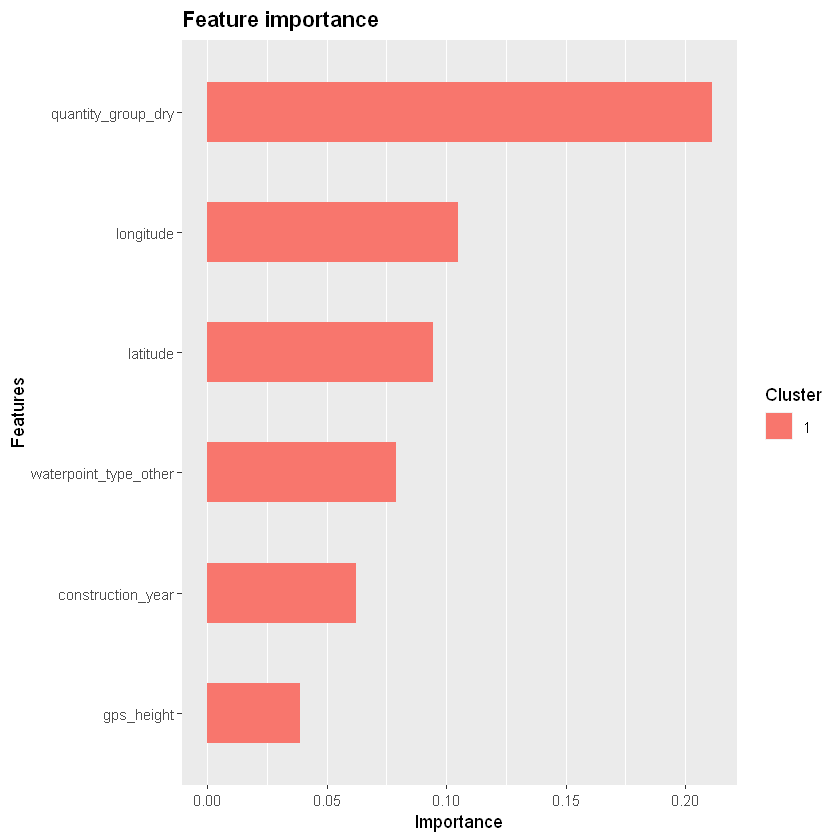

In [17]:
# get the feature real names
names <-  colnames(set_labels[,-1])
# compute feature importance matrix
importance_matrix = xgb.importance(feature_names = names, model = bst_model)
head(importance_matrix)
# plot
gp = xgb.ggplot.importance(head(importance_matrix))
print(gp) 

In [ ]:
# Define the parameters for multinomial classification
num_class = length(levels(states))

params = list(
  booster="gbtree",
  eta=0.7,#79% #0.001 : 72%
  max_depth=5,
  gamma=3,
  subsample=0.75,
  colsample_bytree=1,
  objective="multi:softprob",
  eval_metric="mlogloss",
  num_class=num_class
)
cv.nfold  <- 5
cv_model <- xgb.cv(params = params,
                   data = xgb.train, 
                   nrounds = 200,
                   nfold = cv.nfold,
                   verbose = TRUE,
                   nthread=1,
                   early_stopping_rounds=10,
                   prediction = TRUE)
# the probability that each observation belongs to each class
OOF_prediction <- data.frame(cv_model$pred) %>%
  mutate(max_prob = max.col(., ties.method = "last"),
         label = train.label + 1)
head(OOF_prediction)
confusionMatrix(factor(OOF_prediction$max_prob),
                factor(OOF_prediction$label),
                mode = "everything")

## no cross validation


In [8]:
# Here only use one thread (versus parallel execution using multiple threads) 
# because the data set is relatively small and the algorithm quickly converges-> check for our case

# Train the XGBoost classifer
# test data set, xgb.test, is listed in the watchlist, tells the algorithm to use the test data set for 
# validating performance after every round
# the algorithm will stop early if the performance does not improve after 10 consecutive rounds
# include the training data for additional validation so I can assess the variance between
# the training precision and testing precision to avoid overfitting. (?)
xgb.fit=xgb.train(
  params=params,
  data=xgb.train,
  nrounds=10000,
  nthread=1,
  early_stopping_rounds=10,
  watchlist=list(val1=xgb.train,val2=xgb.test),
  verbose=1,
)
#set the verbose parameter is set to 1 so we can see the results for each round.


# Review the final model and results
xgb.fit

##### xgb.Booster
raw: 113.2 Mb 
call:
  xgb.train(params = params, data = xgb.train, nrounds = 10000, 
    watchlist = list(val1 = xgb.train, val2 = xgb.test), verbose = 0, 
    early_stopping_rounds = 10, nthread = 1)
params (as set within xgb.train):
  booster = "gbtree", eta = "0.001", max_depth = "5", gamma = "3", subsample = "0.75", colsample_bytree = "1", objective = "multi:softprob", eval_metric = "mlogloss", num_class = "3", nthread = "1", validate_parameters = "TRUE"
xgb.attributes:
  best_iteration, best_msg, best_ntreelimit, best_score, niter
callbacks:
  cb.evaluation.log()
  cb.early.stop(stopping_rounds = early_stopping_rounds, maximize = maximize, 
    verbose = verbose)
# of features: 159 
niter: 10000
best_iteration : 10000 
best_ntreelimit : 10000 
best_score : 0.570097 
best_msg : [10000]	val1-mlogloss:0.540776	val2-mlogloss:0.570097 
nfeatures : 159 
evaluation_log:
     iter val1_mlogloss val2_mlogloss
        1      1.097921      1.097994
        2      1.097576 

In [39]:
# Predict outcomes with the test data
xgb.pred = predict(xgb.fit,test.data,reshape=T)
xgb.pred = as.data.frame(xgb.pred)
colnames(xgb.pred) = levels(states)
xgb.pred

ERROR: Error in predict(xgb.fit, test.data, reshape = T): objet 'xgb.fit' introuvable


In [38]:
# Iterate over the predictions and identify the label (class) with the highest probability
# This allows us to evaluate the true performance of the model by comparing the actual labels with the predicted labels
# Use the predicted label with the highest probability
xgb.pred$prediction = apply(xgb.pred,1,function(x) colnames(xgb.pred)[which.max(x)])
xgb.pred$prediction
xgb.pred$label = levels(states)[test.label+1]
xgb.pred$label

ERROR: Error in apply(xgb.pred, 1, function(x) colnames(xgb.pred)[which.max(x)]): objet 'xgb.pred' introuvable


In [37]:
# Calculate the final accuracy
# compares the true labels from the test data set with the predicted labels (with the highest probability)
# represents the percent of water pumps states that were accuracy predicted using the XGBoost model.
result = sum(xgb.pred$prediction==xgb.pred$label)/nrow(xgb.pred)
print(paste("Final Accuracy =",sprintf("%1.2f%%", 100*result)))

ERROR: Error in eval(expr, envir, enclos): objet 'xgb.pred' introuvable


# Conclusions

In [32]:
library("archdata") # for RBGlass1 data
library("xgboost") # Extremee Gradient Boosting model
library("Ckmeans.1d.dp") # for plotting variable importance
library("ggplot2") # Development version, see note above
library("dplyr") # for data munging
# set random seed
set.seed(717)
data(RBGlass1)
dat <- RBGlass1 
dat$Site <- as.numeric(dat$Site)
dat_add <- dat[which(dat$Site == 1),] %>%
  rowwise() %>%
  mutate_each(funs(./10 + rnorm(1,.,.*0.1))) %>%
  mutate_each(funs(round(.,2))) %>%
  mutate(Site = 3)

dat <- rbind(dat, dat_add) %>%
  mutate(Site = Site - 1)

summary(dat)

# Make split index
train_index <- sample(1:nrow(dat), nrow(dat)*0.75)
# Full data set
data_variables <- as.matrix(dat[,-1])
data_label <- dat[,"Site"]
data_matrix <- xgb.DMatrix(data = as.matrix(dat), label = data_label)
# split train data and make xgb.DMatrix
train_data   <- data_variables[train_index,]
train_label  <- data_label[train_index]
train_matrix <- xgb.DMatrix(data = train_data, label = train_label)
# split test data and make xgb.DMatrix
test_data  <- data_variables[-train_index,]
test_label <- data_label[-train_index]
test_matrix <- xgb.DMatrix(data = test_data, label = test_label)

numberOfClasses <- length(unique(dat$Site))
xgb_params <- list("objective" = "multi:softprob",
                   "eval_metric" = "mlogloss",
                   "num_class" = numberOfClasses)
nround    <- 50 # number of XGBoost rounds
cv.nfold  <- 5

# Fit cv.nfold * cv.nround XGB models and save OOF predictions
cv_model <- xgb.cv(params = xgb_params,
                   data = train_matrix, 
                   nrounds = nround,
                   nfold = cv.nfold,
                   verbose = FALSE,
                   prediction = TRUE)

OOF_prediction <- data.frame(cv_model$pred) %>%
  mutate(max_prob = max.col(., ties.method = "last"),
         label = train_label + 1)
head(OOF_prediction)

# confusion matrix
confusionMatrix(factor(OOF_prediction$max_prob),
                factor(OOF_prediction$label),
                mode = "everything")

ERROR: Error in library("archdata"): there is no package called 'archdata'
